In [37]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [175]:
from pyspark.sql import HiveContext
from pyspark.sql.functions import col, max, desc, first, sum, isnull
import matplotlib.pyplot as plt

In [2]:
sqlContext = HiveContext(sc)

In [3]:
sqlContext.sql("show databases").show()

+------------+
|databaseName|
+------------+
|     default|
+------------+



In [49]:
developer = spark.read.csv("/proj_spark/developper/developper.csv", header = True)
display(developer.limit(5))

developer,active,city,autonomous_area,country,est,notable_games_series_or_franchises,notes
0verflow,1,Tokyo,null,Japan,1997,School DaysSummer...,Visual Novel bran...
11 bit studios,1,Warsaw,null,Poland,2010,Frostpunk,Indie developer/p...
1C Company,1,Moscow,null,Russia,1991,King's Bounty: Wa...,Game localization...
1-Up Studio,1,Tokyo,null,Japan,2000,Mother 3,Subsidiary of Nin...
2K Czech,0,Brno,null,Czech Republic,1997,MafiaMafia II,Former subsidiary...


In [48]:
plateform = spark.read.csv("/proj_spark/plateform/plateform.csv", header = True)
display(plateform.limit(5))

initiales,nom,manufactureur,nb_jeu,sortie_eu,sortie_usa,sortir_jp,gen
NES,Nintendo Entertai...,Nintendo,715,1987-10-27,1985-10-18,1983-07-15,3
SNES,Super Nintendo En...,Nintendo,1757,1992-06-06,1991-08-23,1990-11-21,4
N64,Nintendo 64,Nintendo,388,1997-03-01,1996-09-29,1996-06-23,5
GC,Nintendo GameCube,Nintendo,657,2001-05-03,2001-11-18,2001-09-14,6
Wii,Wii,Nintendo,1541,2006-12-08,2006-11-19,2006-12-02,7


In [47]:
publisher = spark.read.csv("/proj_spark/publisher/publisher.csv", header = True)
display(publisher.limit(5))

publisher,headquarters,est,notable_games_published,notes,active
07th Expansion,Japan,2002,Higurashi When Th...,null,1
11 bit studios,"Warsaw , Poland",2010,Frostpunk This Wa...,Also a video game...,1
1C Company,"Moscow, Russia",1991,Il-2 seriesMen of...,Specializes in lo...,1
2K Games,"Novato, Californi...",2005,null,Also a video game...,1
3D Realms,"Garland, Texas, U...",1987,Duke Nukem series,Also a video game...,1


In [190]:
vgsales = spark.read.csv("/proj_spark/vgsales/vgsales.csv", header = True).\
                    withColumn('global_sales', col('global_sales').cast('float')).\
                    withColumn('na_sales', col('na_sales').cast('float')).\
                    withColumn('eu_sales', col('eu_sales').cast('float')).\
                    withColumn('jp_sales', col('jp_sales').cast('float')).\
                    withColumn('other_sales', col('other_sales').cast('float'))
display(vgsales.limit(5))

name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,null,null,null,null,null,null
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
Pokemon Red/Pokem...,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,null,null,null,null,null,null


In [53]:
display(publisher.filter(publisher.publisher == 'Nintendo'))

publisher,headquarters,est,notable_games_published,notes,active
Nintendo,"Kyoto, Japan",1889,MarioLegend of Ze...,Also a video game...,1


## Consolidação de todos os DFs

In [195]:
df = vgsales.join(publisher, vgsales.publisher == publisher.publisher, "left").\
            join(developer, vgsales.developer == developer.developer, "left").\
            join(plateform, vgsales.platform == plateform.initiales, "left")
display(df.limit(5))

name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,publisher,headquarters,est,notable_games_published,notes,active,developer,active,city,autonomous_area,country,est,notable_games_series_or_franchises,notes,initiales,nom,manufactureur,nb_jeu,sortie_eu,sortie_usa,sortir_jp,gen
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E,Nintendo,"Kyoto, Japan",1889,MarioLegend of Ze...,Also a video game...,1,Nintendo,1,Kyoto,null,Japan,1889,Super Mario franc...,First-party devel...,Wii,Wii,Nintendo,1541,2006-12-08,2006-11-19,2006-12-02,7
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,null,null,null,null,null,null,Nintendo,"Kyoto, Japan",1889,MarioLegend of Ze...,Also a video game...,1,null,null,null,null,null,null,null,null,NES,Nintendo Entertai...,Nintendo,715,1987-10-27,1985-10-18,1983-07-15,3
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E,Nintendo,"Kyoto, Japan",1889,MarioLegend of Ze...,Also a video game...,1,Nintendo,1,Kyoto,null,Japan,1889,Super Mario franc...,First-party devel...,Wii,Wii,Nintendo,1541,2006-12-08,2006-11-19,2006-12-02,7
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E,Nintendo,"Kyoto, Japan",1889,MarioLegend of Ze...,Also a video game...,1,Nintendo,1,Kyoto,null,Japan,1889,Super Mario franc...,First-party devel...,Wii,Wii,Nintendo,1541,2006-12-08,2006-11-19,2006-12-02,7
Pokemon Red/Pokem...,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,null,null,null,null,null,null,Nintendo,"Kyoto, Japan",1889,MarioLegend of Ze...,Also a video game...,1,null,null,null,null,null,null,null,null,GB,GameBoy,Nintendo,1055,1989-09-28,1989-07-31,1989-04-21,4


In [196]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- platform: string (nullable = true)
 |-- year_of_release: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- na_sales: float (nullable = true)
 |-- eu_sales: float (nullable = true)
 |-- jp_sales: float (nullable = true)
 |-- other_sales: float (nullable = true)
 |-- global_sales: float (nullable = true)
 |-- critic_score: string (nullable = true)
 |-- critic_count: string (nullable = true)
 |-- user_score: string (nullable = true)
 |-- user_count: string (nullable = true)
 |-- developer: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- headquarters: string (nullable = true)
 |-- est: string (nullable = true)
 |-- notable_games_published: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- active: string (nullable = true)
 |-- developer: string (nullable = true)
 |-- active: string (nullable = true)
 |-- city: s

In [65]:
max_year = df.selectExpr('max(year_of_release)').collect()[0][0]
min_year = df.selectExpr('min(year_of_release)').collect()[0][0]

# print the maximum and minimum years
print("Maximum year of release:", max_year)
print("Minimum year of release:", min_year)

Maximum year of release: 2020
Minimum year of release: 1980


In [71]:
# Jogos mais vendidos por ano

max_sales = df.groupBy('year_of_release').agg(max('global_sales').alias('max_sales'))
top_sellers = df.join(max_sales, (df['year_of_release'] == max_sales['year_of_release']) & (df['global_sales'] == max_sales['max_sales']))
top_sellers.select('name', df['year_of_release'], 'global_sales').orderBy('year_of_release').show(n=df.count(), truncate=False)

+------------------------------------------------+---------------+------------+
|name                                            |year_of_release|global_sales|
+------------------------------------------------+---------------+------------+
|Asteroids                                       |1980           |4.31        |
|Pitfall!                                        |1981           |4.5         |
|Pac-Man                                         |1982           |7.81        |
|Baseball                                        |1983           |3.2         |
|Excitebike                                      |1984           |4.16        |
|Super Mario Bros.                               |1985           |40.24       |
|The Legend of Zelda                             |1986           |6.51        |
|Zelda II: The Adventure of Link                 |1987           |4.38        |
|Super Mario Bros. 2                             |1988           |7.46        |
|Dr. Mario                              

In [157]:
total_sales = df.groupBy(vgsales['publisher']).agg(sum('global_sales').alias('total_sales')).\
orderBy('total_sales')
total_sales.orderBy(total_sales['total_sales'].desc()).show(n=20, truncate=False)

+--------------------------------------+------------------+
|publisher                             |total_sales       |
+--------------------------------------+------------------+
|Nintendo                              |1788.8100064005703|
|Electronic Arts                       |1116.9599984865636|
|Activision                            |731.1599994562566 |
|Sony Computer Entertainment           |606.4799995981157 |
|Ubisoft                               |471.609999448061  |
|Take-Two Interactive                  |403.8200003951788 |
|THQ                                   |338.4399995431304 |
|Konami Digital Entertainment          |282.3900001887232 |
|Sega                                  |270.3500000219792 |
|Namco Bandai Games                    |254.61999975703657|
|Microsoft Game Studios                |248.31999900005758|
|Capcom                                |200.0199995301664 |
|Atari                                 |156.8300000745803 |
|Warner Bros. Interactive Entertainment|

In [95]:
# Jogos mais vendidos mundialmente por empresa, com ano de lançamento e aparelho

top_names = df.groupBy(vgsales['publisher']).\
agg({'global_sales': 'max', 'name': 'first', 'year_of_release': 'first', 'initiales': 'first'}).\
orderBy(desc('max(global_sales)'))

top_names = top_names.select(
    top_names['publisher'], 
    top_names['max(global_sales)'].alias('global_sales'), 
    top_names['first(name)'].alias('top_game'),
    top_names['first(year_of_release)'].alias('year_of_release'),
    top_names['first(initiales)'].alias('device')
)

top_names.show(n=20, truncate=False)

+--------------------------------------+------------+------------------------------------+---------------+------+
|publisher                             |global_sales|top_game                            |year_of_release|device|
+--------------------------------------+------------+------------------------------------+---------------+------+
|Nintendo                              |9.9         |Wii Sports                          |2006           |Wii   |
|Microsoft Game Studios                |9.86        |Kinect Adventures!                  |2010           |X360  |
|Sony Computer Entertainment           |9.72        |Gran Turismo 3: A-Spec              |2001           |PS2   |
|Ubisoft                               |9.44        |Just Dance 3                        |2011           |Wii   |
|Activision                            |9.36        |Call of Duty: Modern Warfare 3      |2011           |X360  |
|Bethesda Softworks                    |8.79        |The Elder Scrolls V: Skyrim        

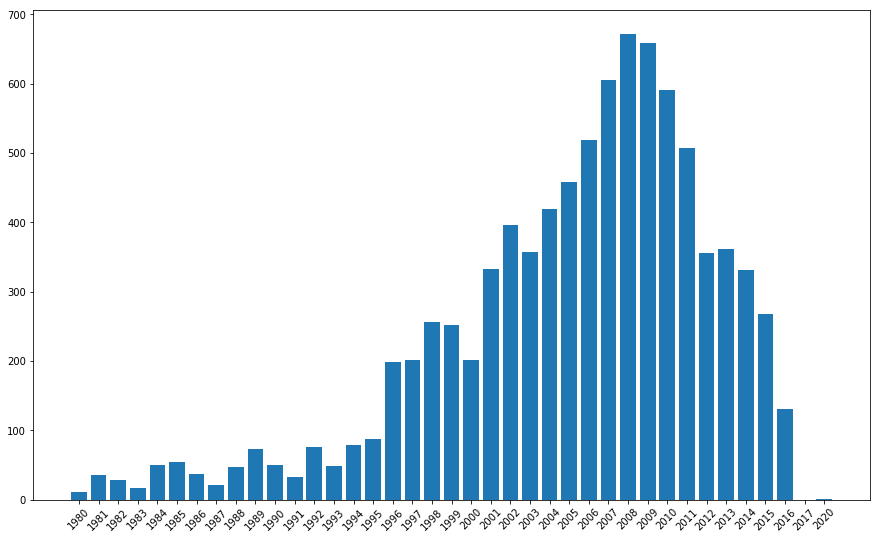

In [192]:
vendas_por_ano = df.filter(isnull('year_of_release') == False).\
                    groupBy('year_of_release').sum('global_sales').orderBy('year_of_release')
vendas_por_ano = vendas_por_ano.select(
                                vendas_por_ano['year_of_release'],
                                vendas_por_ano['sum(global_sales)'].alias('vendas')).\
                                toPandas()


fig, ax = plt.subplots(figsize=(15, 9))
plt.bar(vendas_por_ano['year_of_release'], vendas_por_ano['vendas'])
plt.xticks(rotation=45)

plt.show()

In [227]:
# select the columns of interest and group by year_of_release
sales_by_region_pd = df.filter(isnull('year_of_release') == False).\
                    groupBy('year_of_release').\
                    agg({'global_sales': 'sum', 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

# convert to Pandas DataFrame for plotting
sales_by_region_pd = sales_by_region_pd.select(
                                sales_by_region_pd['year_of_release'],
                                sales_by_region_pd['sum(global_sales)'].alias('vendas_global'),
                                sales_by_region_pd['sum(na_sales)'].alias('na_sales'),
                                sales_by_region_pd['sum(eu_sales)'].alias('eu_sales'),
                                sales_by_region_pd['sum(jp_sales)'].alias('jp_sales')).\
                                toPandas()


sales_by_region_pd.sort_values('year_of_release').head()

,year_of_release,vendas_global,na_sales,eu_sales,jp_sales
28,1980,11.38,10.59,0.67,0.00
12,1981,35.77,33.40,1.96,0.00
9,1982,28.86,26.92,1.65,0.00
27,1983,16.79,7.76,0.80,8.10
7,1984,50.36,33.28,2.10,14.27


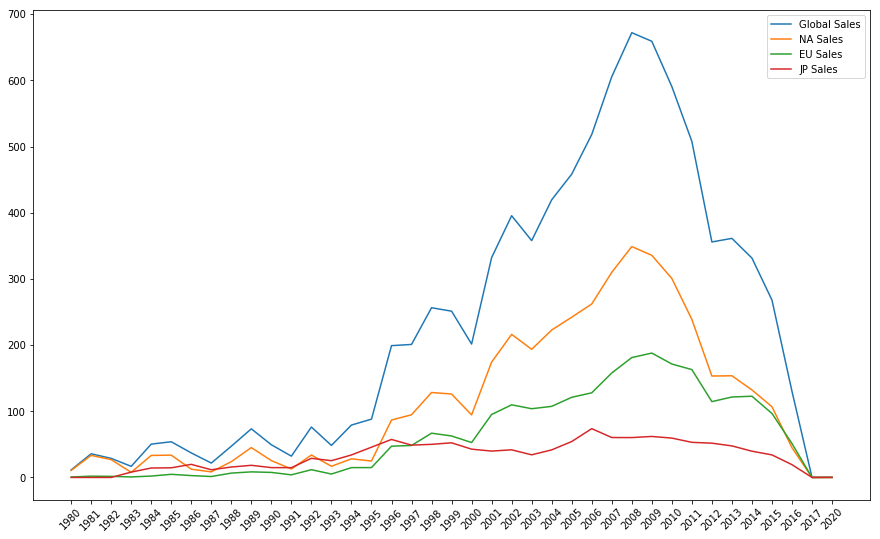

In [234]:
# plot all the sales columns
sales_by_region_pd.plot(kind='line', figsize=(15, 9))

# sort by year_of_release
sales_by_region_pd = sales_by_region_pd.sort_values('year_of_release')


#Clear the plot
plt.clf()

# plot all the sales columns in the same plot
plt.plot(sales_by_region_pd['year_of_release'], sales_by_region_pd['vendas_global'], label='Global Sales')
plt.plot(sales_by_region_pd['year_of_release'], sales_by_region_pd['na_sales'], label='NA Sales')
plt.plot(sales_by_region_pd['year_of_release'], sales_by_region_pd['eu_sales'], label='EU Sales')
plt.plot(sales_by_region_pd['year_of_release'], sales_by_region_pd['jp_sales'], label='JP Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [232]:

sales_by_region_pd.sort_values('year_of_release').head()

,year_of_release,vendas_global,na_sales,eu_sales,jp_sales
28,1980,11.38,10.59,0.67,0.00
12,1981,35.77,33.40,1.96,0.00
9,1982,28.86,26.92,1.65,0.00
27,1983,16.79,7.76,0.80,8.10
7,1984,50.36,33.28,2.10,14.27
